In [108]:
#Setup conections to repo
import geopandas as gpd
url = "https://github.com/meade68/DACSS_690D_Week13_HW3/raw/refs/heads/main/DATA/tl_2020_19_tabblock10.zip"
IA_TRACTS = gpd.read_file(url)
url = "https://github.com/meade68/DACSS_690D_Week13_HW3/raw/refs/heads/main/DATA/DECENNIALDHC2020.H3_2025-12-10T212537/DECENNIALDHC2020.H3-Data.csv"
IA_DATA= gpd.read_file(url)


,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,19,181,021200,2004,191810212002004,Block 2004,G5040,R,None,None,S,0,59136,+41.3638173,-093.7403868,"POLYGON ((-93.75576 41.35022, -93.75576 41.350..."
1,19,005,960400,2133,190059604002133,Block 2133,G5040,R,None,None,S,0,1044890,+43.1636710,-091.1497696,"POLYGON ((-91.15707 43.15842, -91.15697 43.158..."
2,19,161,080300,3040,191610803003040,Block 3040,G5040,R,None,None,S,0,803384,+42.2949334,-095.0199521,"POLYGON ((-95.03434 42.29681, -95.03268 42.296..."
3,19,139,050200,5011,191390502005011,Block 5011,G5040,R,None,None,S,0,30149,+41.5099330,-091.1509046,"POLYGON ((-91.152 41.51093, -91.15197 41.51106..."
4,19,159,950200,3226,191599502003226,Block 3226,G5040,R,None,None,S,1568453,18684,+40.6032477,-094.2758591,"POLYGON ((-94.2817 40.59664, -94.28159 40.6055..."


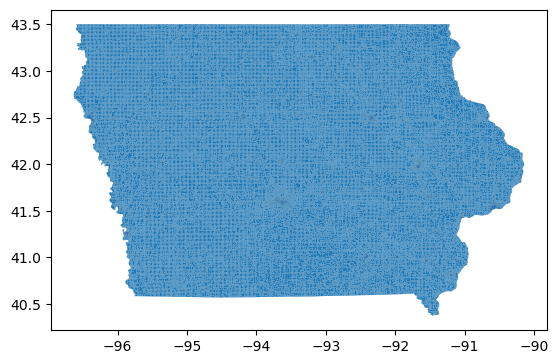

In [109]:
IA_TRACTS.plot()
IA_TRACTS.head()

In [115]:
IA_DATA.head()

,Geography,Geographic Area Name,,!!Total:,!!Total:!!Occupied,!!Total:!!Vacant
0,190019601001001,"Block 1001, Block Group 1, Census Tract 9601, ...",0,0,0,
1,190019601001002,"Block 1002, Block Group 1, Census Tract 9601, ...",0,0,0,
2,190019601001003,"Block 1003, Block Group 1, Census Tract 9601, ...",3,2,1,
3,190019601001004,"Block 1004, Block Group 1, Census Tract 9601, ...",3,3,0,
4,190019601001005,"Block 1005, Block Group 1, Census Tract 9601, ...",0,0,0,


In [119]:
#Drop original column  names. Rename the column names
IA_DATA = IA_DATA.iloc[1:].reset_index(drop=True)
IA_DATA = IA_DATA.iloc[:, :8]
IA_DATA.columns = ["Geography","Geographic Area Name","",	"!!Total:",	"!!Total:!!Occupied",	"!!Total:!!Vacant"]
IA_DATA.head()

,Geography,Geographic Area Name,,!!Total:,!!Total:!!Occupied,!!Total:!!Vacant
0,190019601001002,"Block 1002, Block Group 1, Census Tract 9601, ...",0,0,0,
1,190019601001003,"Block 1003, Block Group 1, Census Tract 9601, ...",3,2,1,
2,190019601001004,"Block 1004, Block Group 1, Census Tract 9601, ...",3,3,0,
3,190019601001005,"Block 1005, Block Group 1, Census Tract 9601, ...",0,0,0,
4,190019601001006,"Block 1006, Block Group 1, Census Tract 9601, ...",0,0,0,


In [120]:
#Trim/replace the first part of the string 
IA_DATA["Geography"] = IA_DATA["Geography"].str.replace("1000000US", "", regex=False)
IA_DATA.head()

,Geography,Geographic Area Name,,!!Total:,!!Total:!!Occupied,!!Total:!!Vacant
0,190019601001002,"Block 1002, Block Group 1, Census Tract 9601, ...",0,0,0,
1,190019601001003,"Block 1003, Block Group 1, Census Tract 9601, ...",3,2,1,
2,190019601001004,"Block 1004, Block Group 1, Census Tract 9601, ...",3,3,0,
3,190019601001005,"Block 1005, Block Group 1, Census Tract 9601, ...",0,0,0,
4,190019601001006,"Block 1006, Block Group 1, Census Tract 9601, ...",0,0,0,


,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,...,AWATER10,INTPTLAT10,INTPTLON10,geometry,Geography,Geographic Area Name,,!!Total:,!!Total:!!Occupied,!!Total:!!Vacant
0,19,181,021200,2004,191810212002004,Block 2004,G5040,R,None,None,...,59136,+41.3638173,-093.7403868,"POLYGON ((-93.75576 41.35022, -93.75576 41.350...",191810212002004,"Block 2004, Block Group 2, Census Tract 212, W...",0,0,0,
1,19,005,960400,2133,190059604002133,Block 2133,G5040,R,None,None,...,1044890,+43.1636710,-091.1497696,"POLYGON ((-91.15707 43.15842, -91.15697 43.158...",190059604002133,"Block 2133, Block Group 2, Census Tract 9604, ...",0,0,0,
2,19,139,050200,5011,191390502005011,Block 5011,G5040,R,None,None,...,30149,+41.5099330,-091.1509046,"POLYGON ((-91.152 41.51093, -91.15197 41.51106...",191390502005011,"Block 5011, Block Group 5, Census Tract 502, M...",0,0,0,
3,19,159,950200,3226,191599502003226,Block 3226,G5040,R,None,None,...,18684,+40.6032477,-094.2758591,"POLYGON ((-94.2817 40.59664, -94.28159 40.6055...",191599502003226,"Block 3226, Block Group 3, Census Tract 9502, ...",1,1,0,
4,19,161,080100,3009,191610801003009,Block 3009,G5040,R,None,None,...,3340,+42.5565426,-095.2526354,"POLYGON ((-95.25275 42.55664, -95.25273 42.556...",191610801003009,"Block 3009, Block Group 3, Census Tract 801, S...",1,1,0,


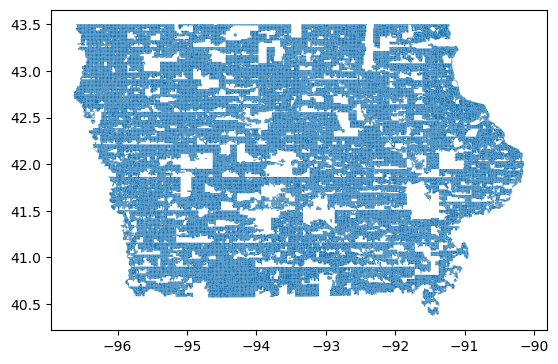

In [139]:
IA_MERGED = IA_TRACTS.merge(IA_DATA, left_on="GEOID10", right_on="Geography", how="inner")
IA_MERGED.plot()
IA_MERGED.head()

In [137]:
#calculate percentage vacant
#calculate percentage vacant
import pandas as pd

# Convert columns to numeric type first, then fill NA values
IA_MERGED["!!Total:"] = pd.to_numeric(IA_MERGED["!!Total:"], errors='coerce').fillna(0)
IA_MERGED["!!Total:!!Vacant"] = pd.to_numeric(IA_MERGED["!!Total:!!Vacant"], errors='coerce').fillna(0)

# Calculate percentage vacant with handling for division by zero
# Use numpy.where to handle cases where Total is zero
import numpy as np
IA_MERGED["PCT_VACANT"] = np.where(
    IA_MERGED["!!Total:"] > 0,  # condition: check if denominator is greater than zero
    IA_MERGED["!!Total:!!Vacant"] / IA_MERGED["!!Total:"],  # if True: perform division
    0  # if False: set to 0 (or another default value you prefer)
)

# Optional: If you want percentage format (0-100 instead of 0-1)
# IA_MERGED["PCT_VACANT"] = IA_MERGED["PCT_VACANT"] * 100


In [138]:
IA_MERGED.head(100)

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,...,INTPTLAT10,INTPTLON10,geometry,Geography,Geographic Area Name,,!!Total:,!!Total:!!Occupied,!!Total:!!Vacant,PCT_VACANT
0,19,181,021200,2004,191810212002004,Block 2004,G5040,R,None,None,...,+41.3638173,-093.7403868,"POLYGON ((-93.75576 41.35022, -93.75576 41.350...",191810212002004,"Block 2004, Block Group 2, Census Tract 212, W...",0,0,0,0.0,0.0
1,19,005,960400,2133,190059604002133,Block 2133,G5040,R,None,None,...,+43.1636710,-091.1497696,"POLYGON ((-91.15707 43.15842, -91.15697 43.158...",190059604002133,"Block 2133, Block Group 2, Census Tract 9604, ...",0,0,0,0.0,0.0
2,19,139,050200,5011,191390502005011,Block 5011,G5040,R,None,None,...,+41.5099330,-091.1509046,"POLYGON ((-91.152 41.51093, -91.15197 41.51106...",191390502005011,"Block 5011, Block Group 5, Census Tract 502, M...",0,0,0,0.0,0.0
3,19,159,950200,3226,191599502003226,Block 3226,G5040,R,None,None,...,+40.6032477,-094.2758591,"POLYGON ((-94.2817 40.59664, -94.28159 40.6055...",191599502003226,"Block 3226, Block Group 3, Census Tract 9502, ...",1,1,0,0.0,0.0
4,19,161,080100,3009,191610801003009,Block 3009,G5040,R,None,None,...,+42.5565426,-095.2526354,"POLYGON ((-95.25275 42.55664, -95.25273 42.556...",191610801003009,"Block 3009, Block Group 3, Census Tract 801, S...",1,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,013,003002,3074,190130030023074,Block 3074,G5040,R,None,None,...,+42.3561985,-092.3023485,"POLYGON ((-92.30575 42.35578, -92.30501 42.356...",190130030023074,"Block 3074, Block Group 3, Census Tract 30.02,...",0,0,0,0.0,0.0
96,19,111,490600,1025,191114906001025,Block 1025,G5040,R,None,None,...,+40.5304605,-091.6177185,"POLYGON ((-91.6204 40.54238, -91.62027 40.5422...",191114906001025,"Block 1025, Block Group 1, Census Tract 4906, ...",11,7,4,0.0,0.0
97,19,109,950100,1080,191099501001080,Block 1080,G5040,R,None,None,...,+43.3053998,-094.1108379,"POLYGON ((-94.11926 43.30983, -94.11923 43.310...",191099501001080,"Block 1080, Block Group 1, Census Tract 9501, ...",2,2,0,0.0,0.0
98,19,175,190300,2225,191751903002225,Block 2225,G5040,R,None,None,...,+40.9420163,-094.4656920,"POLYGON ((-94.47051 40.93548, -94.47051 40.935...",191751903002225,"Block 2225, Block Group 2, Census Tract 1903, ...",0,0,0,0.0,0.0


C:\Users\meade\anaconda3\Lib\site-packages\mapclassify\classifiers.py:1767: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 1.
  self.bins = quantile(y, k=k)


<Axes: >

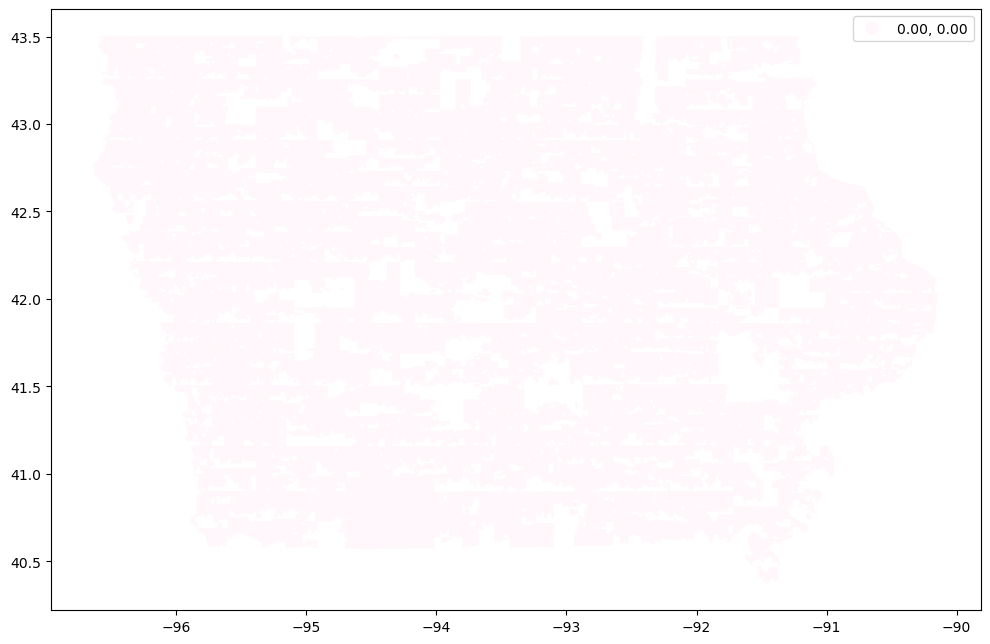

In [128]:
IA_MERGED.plot(
    "PCT_VACANT",
    scheme="quantiles",
    cmap="PuBuGn",
    legend=True,figsize=(12, 10))

In [87]:
from libpysal.graph import Graph
from numpy.random import seed
seed(1)
IA_MERGED_perim=Graph.build_contiguity(IA_MERGED,by_perimeter=True)

In [88]:
#build matrix
IA_MERGED_perim=IA_MERGED_perim.transform("r")

In [90]:
# get spatial lag of PCT_VACANT
ylag = IA_MERGED_perim.lag(IA_MERGED["PCT_VACANT"])

In [92]:
IA_MERGED=IA_MERGED.assign(PCT_VACANT_lagged=ylag)
IA_MERGED.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Occupied,Margin of Error!!Total:!!Occupied,Estimate!!Total:!!Vacant,Margin of Error!!Total:!!Vacant,PCT_VACANT,IA_MERGED_lagged,PCT_VACANT_lagged
0,19,055,950300,19055950300,9503,Census Tract 9503,G5020,S,27142261,64413,...,"Census Tract 9503, Delaware County, Iowa",2335,139,2200,158,135,119,0.057816,0.137511,0.137511
1,19,055,950400,19055950400,9504,Census Tract 9504,G5020,S,735669629,2021640,...,"Census Tract 9504, Delaware County, Iowa",2764,153,1972,155,792,142,0.286541,0.084288,0.084288
2,19,055,950200,19055950200,9502,Census Tract 9502,G5020,S,355629133,914273,...,"Census Tract 9502, Delaware County, Iowa",1271,91,1156,77,115,65,0.090480,0.112141,0.112141
3,19,055,950100,19055950100,9501,Census Tract 9501,G5020,S,377752377,185049,...,"Census Tract 9501, Delaware County, Iowa",1738,137,1587,152,151,63,0.086881,0.177489,0.177489
4,19,169,001200,19169001200,12,Census Tract 12,G5020,S,292480,0,...,"Census Tract 12, Story County, Iowa",43,26,32,21,11,18,0.255814,0.050366,0.050366


<Axes: xlabel='PCT_VACANT', ylabel='PCT_VACANT_lagged'>

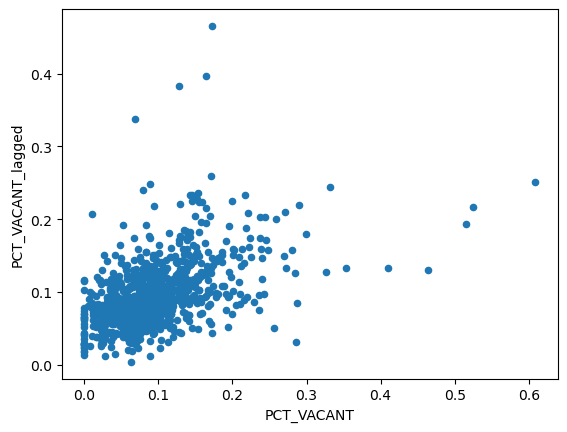

In [93]:
IA_MERGED.plot.scatter("PCT_VACANT","PCT_VACANT_lagged")

OOf.

In [106]:
import esda

import libpysal

# First create a spatial weights matrix from your dataframe
# Assuming IA_MERGED has geometry column for spatial relationships
weights = libpysal.weights.Queen.from_dataframe(IA_MERGED)
# Or alternatively use another weights method like:
# weights = libpysal.weights.KNN.from_dataframe(IA_MERGED, k=5)

# Then use the weights object in the Moran calculation
MoranGlobal_housing = esda.Moran(IA_MERGED['PCT_VACANT'], weights)

MoranGlobal_housing.I,MoranGlobal_housing.p_sim




C:\Users\meade\AppData\Local\Temp\ipykernel_1164\1659581947.py:7: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  weights = libpysal.weights.Queen.from_dataframe(IA_MERGED)


(np.float64(nan), np.float64(0.001))

<Axes: >

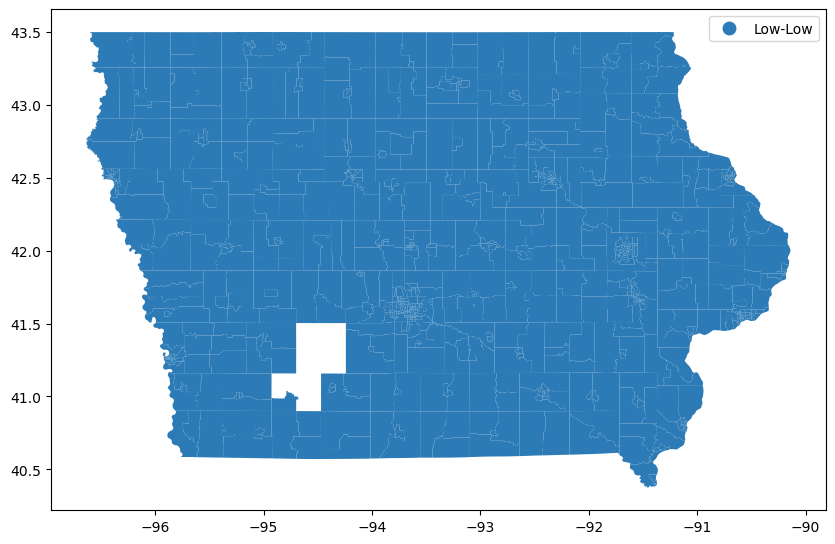

In [105]:
lisa = esda.Moran_Local(IA_MERGED['PCT_VACANT'], IA_MERGED_perim)
lisa.plot(IA_MERGED,crit_value=0.7,figsize=(10,13),legend=True)